In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
sns.set_theme()

In [240]:
twenty_ten = pd.read_csv('2010.csv')
twenty_eleven = pd.read_csv('2011.csv')
twenty_twelve = pd.read_csv('2012.csv')
twenty_thirteen = pd.read_csv('2013.csv')
twenty_fourteen = pd.read_csv('2014.csv')
twenty_fifteen = pd.read_csv('2015.csv')
twenty_sixteen = pd.read_csv('2016.csv')
twenty_seventeen = pd.read_csv('2017.csv')
twenty_eighteen = pd.read_csv('2018.csv')
twenty_nineteen = pd.read_csv('2019.csv')

In [241]:
all_top_songs = pd.concat([twenty_ten, twenty_eleven, twenty_twelve, twenty_thirteen, twenty_fourteen, twenty_fifteen, twenty_sixteen, twenty_seventeen, twenty_eighteen, twenty_nineteen])

In [242]:
all_top_songs.head(52)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [243]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 75.4+ KB


Since there was a column that was named "Unnamed: 0" I changed the name of that column to id.

In [244]:
all_top_songs.rename(columns={"Unnamed: 0": "id"}, inplace=True)


To be able to find duplicates in the dataset I fist needed to get rid of all the whitespace by stripping any extra space around the columns that contained strings.

In [245]:
all_top_songs["title"] = all_top_songs["title"].str.split()
all_top_songs["artist"] = all_top_songs["artist"].str.strip()
all_top_songs["top genre"] = all_top_songs["top genre"].str.strip()


In [246]:
all_top_songs["title"] = all_top_songs["title"].apply(lambda x: ' '.join(x))
all_top_songs.head()

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Missing Data

In [247]:
all_top_songs[all_top_songs.isnull().any(axis=1)]

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop


# What is the most popular song in the dataset?
To find the most popular song in the dataset I sorted the values by the popularity to locate the song title that was the most popular.

In [248]:
sort_song = all_top_songs.sort_values(by="pop", ascending=False)
most_pop = sort_song.iloc[0]
print("Most popular song:", most_pop["title"])


Most popular song: Memories


## What artist has the most songs in the dataset?
To find the artist that has the most songs in the dataset I needed to get a count of all the artists and gather how many times they appeared in the dataset. I set head to 1 to print out the artist with the most songs.

In [249]:
top_artist = all_top_songs["artist"].value_counts().head(1)
print(top_artist)

artist
Katy Perry    17
Name: count, dtype: int64


## What is the most popular genre of music in the dataset?
To find that the most popular genre of music in the dataset I needed to get a full count of all genres and print out the most popular genre.

In [250]:
pop_genre = all_top_songs["top genre"].value_counts().head(1)
print(pop_genre)

top genre
dance pop    327
Name: count, dtype: int64


## Are there any songs in the dataset more than once?
After I stripped the whitespace from the dataset in the columns that contained strings I was able to locate the song title and artist that were in the dataset more than once.

In [251]:
duplicates = all_top_songs[all_top_songs.duplicated(subset=["title", "artist"], keep=False)]
print(duplicates)

     id                                            title         artist  \
4     5                             Just the Way You Are     Bruno Mars   
11   12                                        Marry You     Bruno Mars   
46   47         Written in the Stars (feat. Eric Turner)   Tinie Tempah   
48   49          Castle Walls (feat. Christina Aguilera)           T.I.   
3    55                             Just the Way You Are     Bruno Mars   
13   65                                        Marry You     Bruno Mars   
42   94         Written in the Stars (feat. Eric Turner)   Tinie Tempah   
44   96          Castle Walls (feat. Christina Aguilera)           T.I.   
9   114          We Are Never Ever Getting Back Together   Taylor Swift   
13  153          We Are Never Ever Getting Back Together   Taylor Swift   
39  179  A Little Party Never Killed Nobody (All We Got)         Fergie   
29  240  A Little Party Never Killed Nobody (All We Got)         Fergie   
2   271                  

## Is there a relationship between popularity and danceability?
This scatter plot shows the relationship between danceability and popularity where when the danceability increases so does the popularity. This shows a positive correlation.

<Axes: xlabel='dnce', ylabel='pop'>

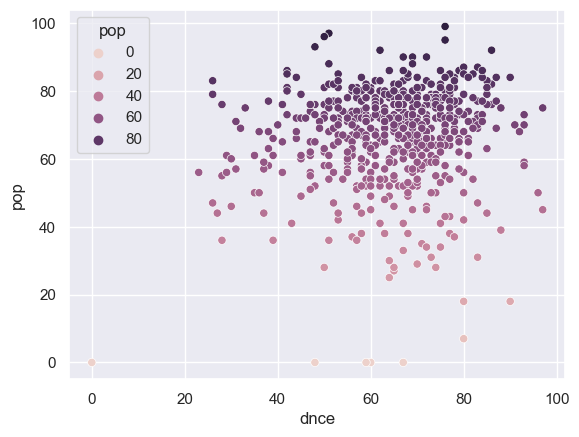

In [260]:
sns.scatterplot(data=all_top_songs, x="dnce", y="pop", hue="pop")

## Does having a higher bpm lead to having a higher energy score?
In this scatter plot the darker the dot is the higher the energy score is. For the most part the higher the bpm are so is the energy score. When the beats per minute are between 70 and 160 the energy score is the highest.

<Axes: xlabel='bpm', ylabel='nrgy'>

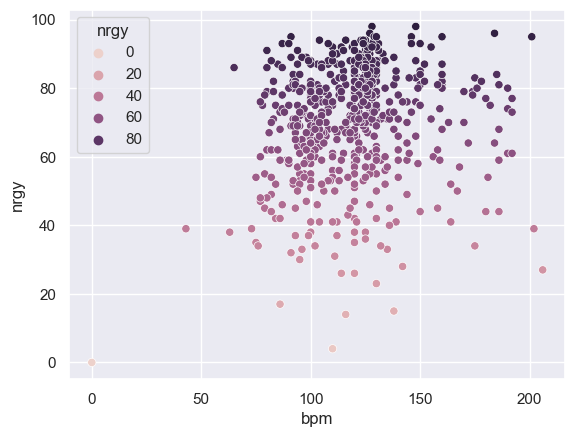

In [258]:
sns.scatterplot(data=all_top_songs, x="bpm", y="nrgy", hue="nrgy")

## Which genre has the highest energy score?
The energy had to grouped by the type of genre first to be able to find the genre with the highest energy score. Then the average was calculated using the mean function.

In [ ]:
energy_by_genre = all_top_songs.groupby("top genre")["nrgy"].mean()
highest_energy = energy_by_genre.idxmax()
highest_energy_score = energy_by_genre.max()
print(f"The genre with the highest energy score is '{highest_energy}' with a average energy score of {highest_energy_score:.2f}")

The genre with the highest energy score is 'french indie pop' with a average energy score of 89.00


## Export the combined dataset into a CSV called top_spotify_songs.csv
All the years of csv files were first combined into a dataset set to all_top_songs and from there was able to transfer them into a csv file. By setting the index to false this ensures that when the csv file is imported back into the DataFrame the index is not included and it will automatically use the default integer index. If the index is not set to false, you could end up with a extra index column that can cause confusion and won't contain any meaningful data.

In [ ]:
all_top_songs.to_csv("top_spotify_songs.csv", index=False)

## What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)
First I needed to get a count of songs that were recorded live greater than 50. From there I was able to get a total count of all songs greater than 50 and divide the two and multiply that total by 100. I used the f string format in the print statement along with specifying the decimal be rounded to two points.

In [ ]:
live_songs_count = all_top_songs[all_top_songs["live"] > 50].shape[0]
total_songs = all_top_songs.shape[0]
percent_live = (live_songs_count / total_songs) * 100
print(f"The percentage of songs recorded live is: {percent_live:.2f}%")

The percentage of songs recorded live is: 2.99%


## What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)
First I needed to get a count of songs that were acoustic and greater than 50. From there I was able to get a total count of all  acoustic songs greater than 50 and divide the two and multiply that total by 100. I used the f string format in the print statement along with specifying the decimal be rounded to two points.

In [ ]:
acoustic_songs_count = all_top_songs[all_top_songs["acous"] > 50].shape[0]
total_acoustic = all_top_songs.shape[0]
percent_acoustic = (acoustic_songs_count / total_acoustic) * 100
print(f"The percentage of acoustic songs recorded is: {percent_acoustic:.2f}%")

The percentage of acoustic songs recorded is: 7.30%


## Which year’s songs have the highest amount of spoken word in the song?
First I had to group the years along with words spoken (spch) and add them up. Then I was able to get the index of the year and the maximum words spoken for that particular year and printed it out using the f string format to tell the year and the sum of words spoken for that year.

In [261]:
year_by_words = all_top_songs.groupby("year")["spch"].sum()
highest_year = year_by_words.idxmax()
highest_year_spoken = year_by_words.max()
print(f"The year with the highest spoken amount of words is: '{highest_year}' with the average spoken words of {highest_year_spoken:.2f}")

The year with the highest spoken amount of words is: '2015' with the average spoken words of 670.00
